# PROJECT TITLE 

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [18]:
import pandas as pd 

from IPython.display import Markdown, display

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [20]:
df = pd.read_csv('data/kc_house_data.csv')
df.head(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,NO,NONE,...,7 Average,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045
96,3422049190,3/30/2015,247500.0,3,1.75,1960,15681,1.0,NO,NONE,...,7 Average,1960,0.0,1967,0.0,98032,47.3576,-122.277,1750,15616
97,1099611230,9/12/2014,199000.0,4,1.50,1160,6400,1.0,NO,NONE,...,7 Average,1160,0.0,1975,0.0,98023,47.3036,-122.378,1160,6400
98,722079104,7/11/2014,314000.0,3,1.75,1810,41800,1.0,NO,NONE,...,7 Average,1210,600.0,1980,0.0,98038,47.4109,-121.958,1650,135036


In [21]:
df['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [22]:
display(Markdown("column_names.md"))

column_names.md

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [23]:
df = df.dropna()

In [24]:
df['view'].replace({"NONE": 1, "FAIR": 2, "AVERAGE": 3, "GOOD": 4, "EXCELLENT": 5}, inplace=True)

In [25]:
df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [26]:
df['grade'].replace({'7 Average': 7 , '8 Good': 8, '11 Excellent': 11, '9 Better': 9, '6 Low Average': 6,
       '5 Fair': 5, '10 Very Good': 10, '12 Luxury': 12, '4 Low': 4, '3 Poor': 3,
       '13 Mansion': 13}, inplace=True)

In [27]:
def find_dist(lat_cell, long_cell):
    seattle_lat = 47.6062
    seattle_long = -122.3321
    distance = np.sqrt((lat_cell-seattle_lat)**2 + (long_cell-seattle_long)**2)
    return distance

In [28]:
df['Area'] = df.apply(lambda x: find_dist(x['lat'], x['long']), axis=1)

In [72]:
city = df.loc[df['Area'] < 10 ]
metro = df.loc[df['Area'] > 10 ]

In [76]:
city['price'].describe()

count    5.863000e+03
mean     6.279580e+05
std      4.639080e+05
min      8.200000e+04
25%      3.717500e+05
50%      5.099900e+05
75%      7.200000e+05
max      7.700000e+06
Name: price, dtype: float64

In [77]:
metro['price'].describe()

count    9.362000e+03
mean     4.828466e+05
std      2.702848e+05
min      8.500000e+04
25%      2.998250e+05
50%      4.220000e+05
75%      5.924625e+05
max      4.500000e+06
Name: price, dtype: float64

In [71]:
df['Area'].describe()

count    15762.000000
mean        13.886880
std          8.399173
min          1.000000
25%          7.000000
50%         12.000000
75%         20.000000
max         71.000000
Name: Area, dtype: float64

In [82]:
# df['Area'].replace({<10: 0, >10: 1}, inplace=True)
df['Area'] = df['Area'].apply(lambda x: 0 if x < 10 else 1)

In [94]:
df.loc[df['Area']==1].describe()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,Area
count,9.899000e+03,9899.000000,9899.000000,9899.000000,9899.000000,9899.000000,9899.000000,9899.0
mean,4.900014e+05,3.476513,2.205677,2197.434387,1.487524,1.186787,7.764926,1.0
std,2.934036e+05,0.808952,0.700268,888.700235,0.500425,0.698382,1.182139,0.0
min,8.300000e+04,1.000000,0.500000,440.000000,1.000000,1.000000,3.000000,1.0
25%,2.999900e+05,3.000000,1.750000,1570.000000,1.000000,1.000000,7.000000,1.0
50%,4.220000e+05,3.000000,2.250000,2050.000000,1.500000,1.000000,8.000000,1.0
75%,5.991900e+05,4.000000,2.500000,2670.000000,2.000000,1.000000,8.000000,1.0
max,5.110000e+06,10.000000,8.000000,13540.000000,3.000000,5.000000,13.000000,1.0


In [93]:
Area = []
for x in df['Area']:
    miles = round(x * 69)
    Area.append(miles)

In [58]:
len(Area)

15762

In [59]:
df['Area'] = Area

In [31]:
df = df.drop(columns=['id', 'date', 'waterfront', 'condition', 'lat', 'long', 'sqft_basement', 'sqft_lot', 'sqft_above', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'zipcode'])
df

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,Area
1,538000.0,3,2.25,2570,2.0,1,7,0.115545
3,604000.0,4,3.00,1960,1.0,1,7,0.104890
4,510000.0,3,2.00,1680,1.0,1,8,0.287296
5,1230000.0,4,4.50,5420,1.0,1,11,0.330884
6,257500.0,3,2.25,1715,2.0,1,7,0.296544
...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2.0,1,8,0.082151
21592,360000.0,3,2.50,1530,3.0,1,8,0.094132
21593,400000.0,4,2.50,2310,2.0,1,8,0.100071
21594,402101.0,2,0.75,1020,2.0,1,7,0.035140


In [15]:
df = df.drop(columns=['floors'])
df

,price,bedrooms,bathrooms,sqft_living,view,grade
0,221900.0,3,1.00,1180,NONE,7 Average
1,538000.0,3,2.25,2570,NONE,7 Average
2,180000.0,2,1.00,770,NONE,6 Low Average
3,604000.0,4,3.00,1960,NONE,7 Average
4,510000.0,3,2.00,1680,NONE,8 Good
...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,NONE,8 Good
21593,400000.0,4,2.50,2310,NONE,8 Good
21594,402101.0,2,0.75,1020,NONE,7 Average
21595,400000.0,3,2.50,1600,NONE,8 Good


In [16]:
df = df.loc[df['bedrooms']<=4]
df

,price,bedrooms,bathrooms,sqft_living,view,grade
0,221900.0,3,1.00,1180,NONE,7 Average
1,538000.0,3,2.25,2570,NONE,7 Average
2,180000.0,2,1.00,770,NONE,6 Low Average
3,604000.0,4,3.00,1960,NONE,7 Average
4,510000.0,3,2.00,1680,NONE,8 Good
...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,NONE,8 Good
21593,400000.0,4,2.50,2310,NONE,8 Good
21594,402101.0,2,0.75,1020,NONE,7 Average
21595,400000.0,3,2.50,1600,NONE,8 Good


## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

<AxesSubplot:>

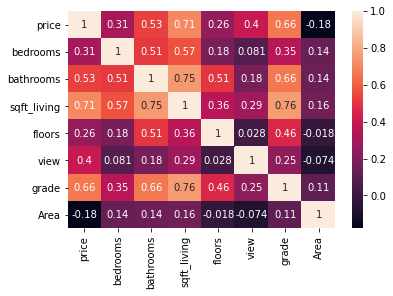

In [84]:
sns.heatmap(df.corr(), annot=True)

In [85]:
X= df.drop(columns='price')
Y= df['price']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [90]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X_train)
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     3221.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:15:49   Log-Likelihood:            -1.6217e+05
No. Observations:               11821   AIC:                         3.244e+05
Df Residuals:                   11813   BIC:                         3.244e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.208e+05   1.81e+04    -23.250      0.000   -4.56e+05   -3.85e+05
bedrooms     -3.02e+04   2689.157    -11.230      0.000   -3.55e+04   -2.49e+04
bathrooms   -4294.4184   4436.324     -0.968      0.333    -1.3e+04    4401.508
sqft_living   225.9406      4.368     51.725      0.000     217.378     234.503
floors      -4.663e+04   4556.419    -10.234      0.000   -5.56e+04   -3.77e+04
view         7.858e+04   2840.278     27.666      0.000     7.3e+04    8.41e+04
grade        9.254e+04   2874.177     32.196      0.000    8.69e+04    9.82e+04
Area        -2.114e+05   4306.443    -49.085      0.000    -2.2e+05   -2.03e+05
==============================================================================
Omnibus:                     9874.655   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           985567.190
Skew:                           3.453   Prob(JB):                         0.00
Kurtosis:                      47.196   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation

- This model explains 48% of our variance in our Y
- Bathrooms and Square foot of the house are statistically significant with a p-value of 0.
- one additional bedroom unit drives down the expected price by about -6.948e+04
- one additional sqft_living unit drives up the expected price by about 296.

In [91]:
X_test_scaled = ss.fit_transform(X_test)
results = sm.OLS(y_test, sm.add_constant(X_test)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1050.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:15:51   Log-Likelihood:                -53992.
No. Observations:                3941   AIC:                         1.080e+05
Df Residuals:                    3933   BIC:                         1.080e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.394e+05   3.12e+04    -14.063      0.000   -5.01e+05   -3.78e+05
bedrooms    -3.158e+04   4939.825     -6.393      0.000   -4.13e+04   -2.19e+04
bathrooms    2.423e+04   7716.086      3.141      0.002    9104.531    3.94e+04
sqft_living   206.9718      7.739     26.745      0.000     191.800     222.144
floors      -5.679e+04   7663.710     -7.410      0.000   -7.18e+04   -4.18e+04
view         6.445e+04   4741.966     13.591      0.000    5.52e+04    7.37e+04
grade        9.794e+04   4919.460     19.909      0.000    8.83e+04    1.08e+05
Area        -2.285e+05   7300.632    -31.304      0.000   -2.43e+05   -2.14e+05
==============================================================================
Omnibus:                     2395.615   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65362.201
Skew:                           2.413   Prob(JB):                         0.00
Kurtosis:                      22.359   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X2= df['bedrooms']
Y2= df['price']

In [ ]:
model_no_intercept = sm.OLS(Y2, X2)
results_no_intercept = model_no_intercept.fit()
results_no_intercept.params

In [ ]:
random_X = [1, 3 , 5 ]
results_no_intercept.predict(random_X)

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(X_tr, X_te, y_tr, y_te, log=False):
    '''
    I EXPECT YOU TO WRITE A GOOD DOCSTRING HERE
    If you copy this word for word, and don't make it your own, please credit Lindsey
    '''
    # Create and fit model
    model = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
    
    # Print summary (if OLS)
    print(model.summary())
    
    # Grab predictions
    tr_preds = model.predict(sm.add_constant(X_tr))    
    te_preds = model.predict(sm.add_constant(X_te))
    
    # Evaluate on train and test
    print("*"*20)
    print(f"Train R2 Score: {r2_score(y_tr, tr_preds):.4f}")
    if log == True:
        y_tr_unlog = np.expm1(y_tr)
        tr_preds_unlog = np.expm1(tr_preds)      
        print(f"Train MAE Score: ${mean_absolute_error(y_tr_unlog, tr_preds_unlog):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr_unlog, tr_preds_unlog, squared=False):.4f}")
    else:
        print(f"Train MAE Score: ${mean_absolute_error(y_tr, tr_preds):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr, tr_preds, squared=False):.4f}")
    print("*"*20)
    print(f"Test R2 Score: {r2_score(y_te, te_preds):.4f}")
    if log == True:
        y_te_unlog = np.expm1(y_te)
        te_preds_unlog = np.expm1(te_preds)
        print(f"Test MAE Score: ${mean_absolute_error(y_te_unlog, te_preds_unlog):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te_unlog, te_preds_unlog, squared=False):.4f}")          
    else:
        print(f"Test MAE Score: ${mean_absolute_error(y_te, te_preds):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te, te_preds, squared=False):.4f}")  
    print("*"*20)
    
    # Visualize residuals
    plt.scatter(tr_preds, y_tr-tr_preds, label='Train')
    plt.scatter(te_preds, y_te-te_preds, label='Test')

    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()
    
    return tr_preds, te_preds

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3181.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:47:15   Log-Likelihood:            -1.6247e+05
No. Observations:               11821   AIC:                         3.249e+05
Df Residuals:                   11813   BIC:                         3.250e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.617e+05   1.89e+04    -19.182      

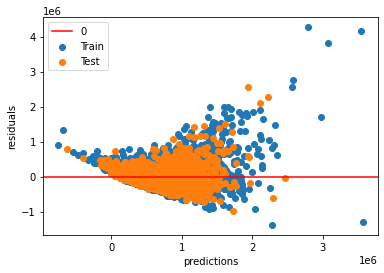

(20589    4.752076e+05
 1440     4.379609e+05
 7613     4.869761e+05
 20975    6.606037e+05
 6442     2.258695e+05
              ...     
 7039     9.873687e+05
 387      3.811701e+05
 275      6.362811e+05
 5645     7.580303e+05
 17888    1.107942e+06
 Length: 11821, dtype: float64,
 8829     9.803582e+05
 2694     5.148234e+05
 2956     1.006497e+06
 5147     5.902027e+05
 3747     5.362821e+05
              ...     
 5430     6.374105e+05
 13423    4.778590e+05
 9435     3.736815e+05
 13041    2.719589e+05
 4653     7.227403e+05
 Length: 3941, dtype: float64)

In [70]:
evaluate_model(
X_train,
X_test,
y_train,
y_test)

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?